In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

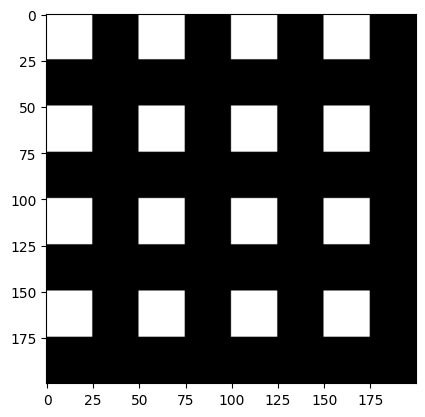

In [ ]:
img_size = 200
cell_size = img_size // 8

img = np.zeros((img_size, img_size, 1), dtype=np.uint8)

for i in range(0, img_size, cell_size * 2):
    for j in range(0, img_size, cell_size * 2):
        img[i:(i+cell_size), j:(j+cell_size), 0] = 255

plt.imshow(img, cmap='gray')
plt.show()

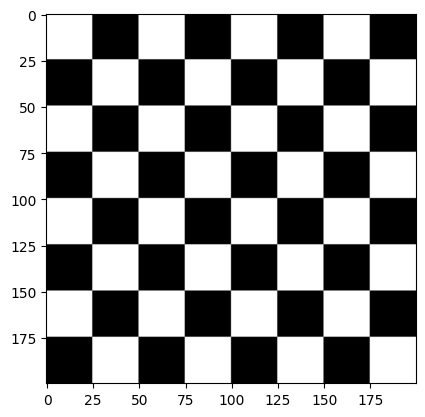

In [ ]:
for i in range(cell_size, img_size, cell_size * 2):
    for j in range(cell_size, img_size, cell_size * 2):
        img[i:(i+cell_size), j:(j+cell_size), 0] = 255

plt.imshow(img, cmap='gray')
plt.show()

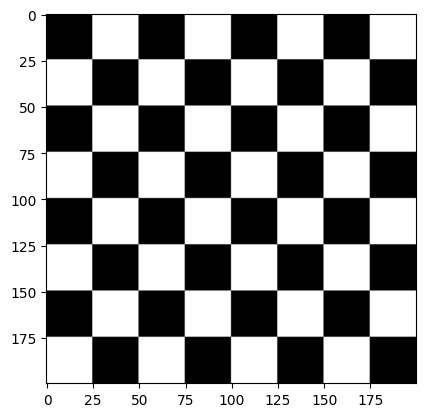

In [ ]:
img_size = 200
cell_size = img_size // 8

img = np.zeros((img_size, img_size, 1), dtype=np.uint8)

for i in range(0, img_size, cell_size):
    for j in range(0, img_size, cell_size):
        img[i:(i+cell_size), j:(j+cell_size), 0] = ((i + j) % 2) * 255

plt.imshow(img, cmap='gray')
plt.show()

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ ) con las funciones de dibujo de OpenCV

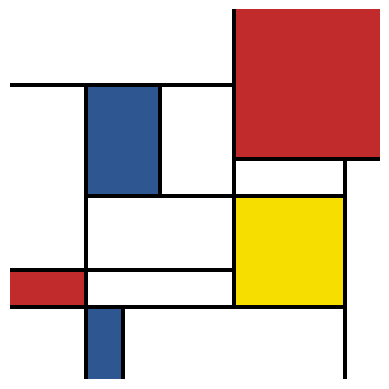

In [ ]:
img_size = 100

black = (0, 0, 0)
blue = (46, 87, 146)
red = (194, 43, 44)
yellow = (245, 222, 0)

img = np.full((img_size, img_size, 3), 255, dtype=np.uint8)

cv2.rectangle(img, (20, 20), (40, 50), blue, -1)
cv2.rectangle(img, (60, 0), (100, 40), red, -1)
cv2.rectangle(img, (60, 50), (90, 80), yellow, -1)
cv2.rectangle(img, (20, 80), (30, 100), blue, -1)
cv2.rectangle(img, (0, 70), (20, 80), red, -1)

cv2.line(img, (0, 20), (60, 20), black, 1)
cv2.line(img, (20, 50), (90, 50), black, 1)
cv2.line(img, (0, 80), (90, 80), black, 1)
cv2.line(img, (0, 70), (60, 70), black, 1)
cv2.line(img, (60, 40), (100, 40), black, 1)

cv2.line(img, (20, 20), (20, 100), black, 1)
cv2.line(img, (90, 40), (90, 100), black, 1)
cv2.line(img, (60, 0), (60, 80), black, 1)
cv2.line(img, (40, 20), (40, 50), black, 1)
cv2.line(img, (30, 80), (30, 100), black, 1)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

TAREA: Modifica de forma libre los valores de un plano de la imagen

In [15]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = g - (frame[:,:,2] // 32) * 32

        modified_frame = np.dstack((b, g, r))
        cv2.imshow('Vid', modified_frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

TAREA: Llevar a cabo una propuesta propia de pop art


Se me ocurre buscar una imagen de tipo comic con muchos degradados y sombras, y buscar aplicar lo de los circulitos a todos los grises de la imagen, y luego jugar a invertir color o desplazarlos en diferentes cuadrantes

referencia: https://duckduckgo.com/?q=pop+art+images&t=newext&atb=v478-1&ia=images&iax=images&iai=https%3A%2F%2Fi.pinimg.com%2Foriginals%2F73%2F2f%2F7e%2F732f7eb13c2d563a7e9b7c473d1790f0.jpg

